# Portfolio Optimization of Shale Oil Companies

In [1]:
#This is a program to help optimize a group of stocks using the Efficient Frontier Package
#
# Importing the licenses used throughout the process

from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [2]:
# Obtain the stock tickers from the portfolio
# Marathon Oil, Continental, Oxy, Parsley, Pioneer, EOG Resources

portfolio = ['MRO', 'MU','AQN.TO','PKI.TO','VOO']

In [3]:
# Assign weights to optimize
weight = np.array([0.2,0.2,0.2,0.2,0.2])

In [4]:
# Stock Start and end Date, we will look at the past 5 years
StockStart = '2018-07-01'
StockEnd = datetime.today().strftime('%Y-%m-%d')

In [5]:
StockEnd # date in correct format

'2020-07-22'

In [6]:
# create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

In [7]:
for i in portfolio:
    df[i] = web.get_data_yahoo(i,start=StockStart,end=StockEnd)['Adj Close']

In [8]:
#Check to see if it's working 
df.tail()

,MRO,MU,AQN.TO,PKI.TO,VOO
Date,,,,,
2020-07-16,5.72,50.099998,18.590000,34.888885,294.769989
2020-07-17,5.51,49.470001,18.740000,35.277756,295.549988
2020-07-20,5.49,51.209999,18.299999,34.848999,298.010010
2020-07-21,5.86,51.520000,17.980000,35.770000,298.630005
2020-07-22,5.79,51.650002,18.070000,35.400002,300.329987


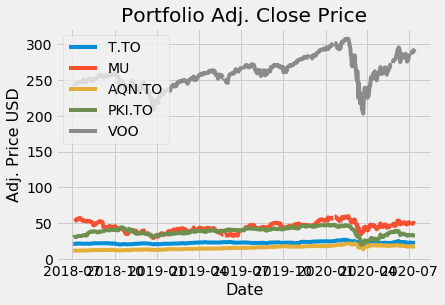

In [65]:
#look at the stock / portfolio by chart.
my_port = df

for q in my_port.columns.values:
    plt.plot(my_port[q], label = q)
    
plt.title('Portfolio Adj. Close Price')
plt.xlabel('Date',fontsize=16)
plt.ylabel('Adj. Price USD', fontsize=16)
plt.legend(df.columns.values, loc = 'upper left')


In [66]:
#show the daily simple return
returns = df.pct_change()

In [67]:
returns.head()

,T.TO,MU,AQN.TO,PKI.TO,VOO
Date,,,,,
2018-07-03,NaN,NaN,NaN,NaN,NaN
2018-07-04,0.000431,0.000000,-0.003946,0.010439,0.000000
2018-07-05,0.001291,0.026418,0.001585,0.001216,0.008562
2018-07-06,0.014191,0.007381,-0.000791,-0.007891,0.008329
2018-07-09,-0.001908,0.020289,-0.007126,-0.003671,0.008853


In [68]:
#Create and show the annualized covariance matrix.  Shows the relationship between two different variables.  
cov_matrix = returns.cov()*252
cov_matrix

,T.TO,MU,AQN.TO,PKI.TO,VOO
T.TO,0.060525,0.055774,0.054280,0.046541,0.043730
MU,0.055774,0.279078,0.047841,0.082792,0.099210
AQN.TO,0.054280,0.047841,0.095883,0.061825,0.050657
PKI.TO,0.046541,0.082792,0.061825,0.182392,0.056953
VOO,0.043730,0.099210,0.050657,0.056953,0.067514


In [69]:
#Calculate the portfolio variance
port_variance = np.dot(weight.T, np.dot(cov_matrix, weight))
port_variance

0.07538398800333214

In [70]:
#Calculate the portfolio volatility (standard deviation)
port_vol = np.sqrt(port_variance)
port_vol

0.27456144668057847

In [71]:
#Calculate the annual portfolio return 
Annual_Return = np.sum(returns.mean()*weight)*252
Annual_Return

0.14362173689078014

In [72]:
#Show expected annual return, volatility (risk) and variance
percent_var = str(round(port_variance,2)*100) + '%'
percent_vol = str(round(port_vol,2)*100) + '%'
percent_ret = str(round(Annual_Return,2)*100) + '%'

print('Expected annual return: '+percent_ret)
print('Annual volatility(risk): '+percent_vol)
print('Annual variance: '+percent_var)




Expected annual return: 14.000000000000002%
Annual volatility(risk): 27.0%
Annual variance: 8.0%


In [73]:
#Adjust portfolio to get a higher Annual Return with a lower risk 
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [74]:
#Portfolio Optimization Time

In [75]:
#Calculate the expected returns and the annualised sample covariance matrix of asset returns
mean = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

In [76]:
# Optimize for the maximum Sharpe ratio
ef = EfficientFrontier(mean,S)
weight2 = ef.max_sharpe()
clean_weights = ef.clean_weights()
print(clean_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('T.TO', 0.0), ('MU', 0.0), ('AQN.TO', 1.0), ('PKI.TO', 0.0), ('VOO', 0.0)])
Expected annual return: 26.5%
Annual volatility: 31.0%
Sharpe Ratio: 0.79


(0.2654049050478442, 0.3096503594446382, 0.7925225906018032)

In [77]:
#Get the allocaiton of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_price = get_latest_prices(df)
weight3 = clean_weights
da = DiscreteAllocation(weight3,latest_price,total_portfolio_value=20000)

allocation, leftover = da.lp_portfolio()
print('Discrete Allocation: ',allocation)
print('Funds Remaining: ${:.2f}'.format(leftover))

Discrete Allocation:  {'AQN.TO': 1103.0}
Funds Remaining: $2.61
